In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import joblib

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('EBill.csv', low_memory=False)
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.00,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.00,3571.00,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.00,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.00,3563.99,50.60


In [4]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [6]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

In [11]:
df = df.replace("?", np.nan)

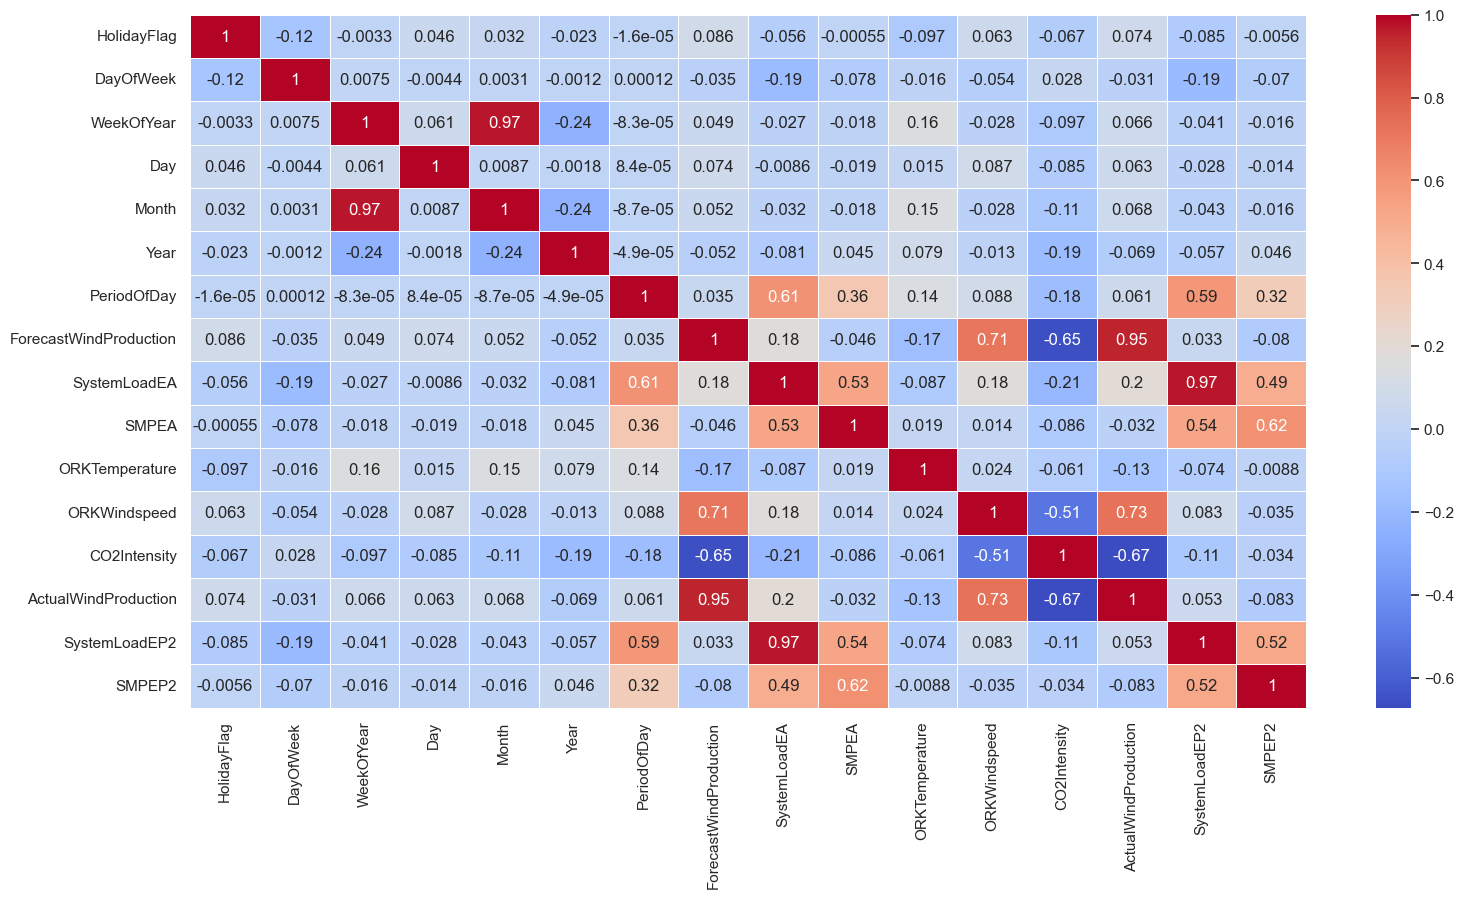

In [15]:
plt.figure(figsize=(18,9))
corr = df.corr()
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [33]:
df['DayOfWeek'].value_counts()

DayOfWeek
1    5472
2    5424
3    5424
4    5424
5    5424
0    5424
6    5422
Name: count, dtype: int64

In [32]:
df

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0,1,44,1,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,0,1,44,1,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,0,1,44,1,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,0,1,44,1,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,0,1,44,1,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,31,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.00,3692.95,42.45
38010,1,1,1,31,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.00,3571.00,33.83
38011,1,1,1,31,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.00,3460.29,31.75
38012,1,1,1,31,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.00,3563.99,50.60


In [34]:
data = df[['DayOfWeek','ForecastWindProduction','SystemLoadEA','SMPEA','ORKTemperature','CO2Intensity','ActualWindProduction','SystemLoadEP2','SMPEP2']]

In [35]:
data

,DayOfWeek,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,1,315.31,3388.77,49.26,6.00,600.71,356.00,3159.60,54.32
1,1,321.80,3196.66,49.26,6.00,605.42,317.00,2973.01,54.23
2,1,328.57,3060.71,49.10,5.00,589.97,311.00,2834.00,54.23
3,1,335.60,2945.56,48.04,6.00,585.94,313.00,2725.99,53.47
4,1,342.90,2849.34,33.75,6.00,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...
38009,1,1179.14,3932.22,34.51,6.00,285.31,812.00,3692.95,42.45
38010,1,1152.01,3821.44,33.83,5.00,278.31,852.00,3571.00,33.83
38011,1,1123.67,3724.21,31.75,4.00,280.91,962.00,3460.29,31.75
38012,1,1094.24,3638.16,33.83,5.00,302.46,950.00,3563.99,50.60


In [90]:
print(df.iloc[1].values)

[np.int64(0) np.int64(1) np.int64(44) np.int64(1) np.int64(2011)
 np.int64(1) '321.80' '3196.66' '49.26' '6.00' '11.10' '605.42' '317.00'
 '2973.01' '54.23']


In [41]:
data.dtypes

DayOfWeek                  int64
ForecastWindProduction    object
SystemLoadEA              object
SMPEA                     object
ORKTemperature            object
CO2Intensity              object
ActualWindProduction      object
SystemLoadEP2             object
SMPEP2                    object
dtype: object

In [69]:
data.isnull().sum()

DayOfWeek                   0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [70]:
data = data.dropna()

In [45]:
num_cols = data.columns.drop("DayOfWeek")
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors="coerce")


C:\Users\ankit\AppData\Local\Temp\ipykernel_30256\2015827362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = data[num_cols].apply(pd.to_numeric, errors="coerce")


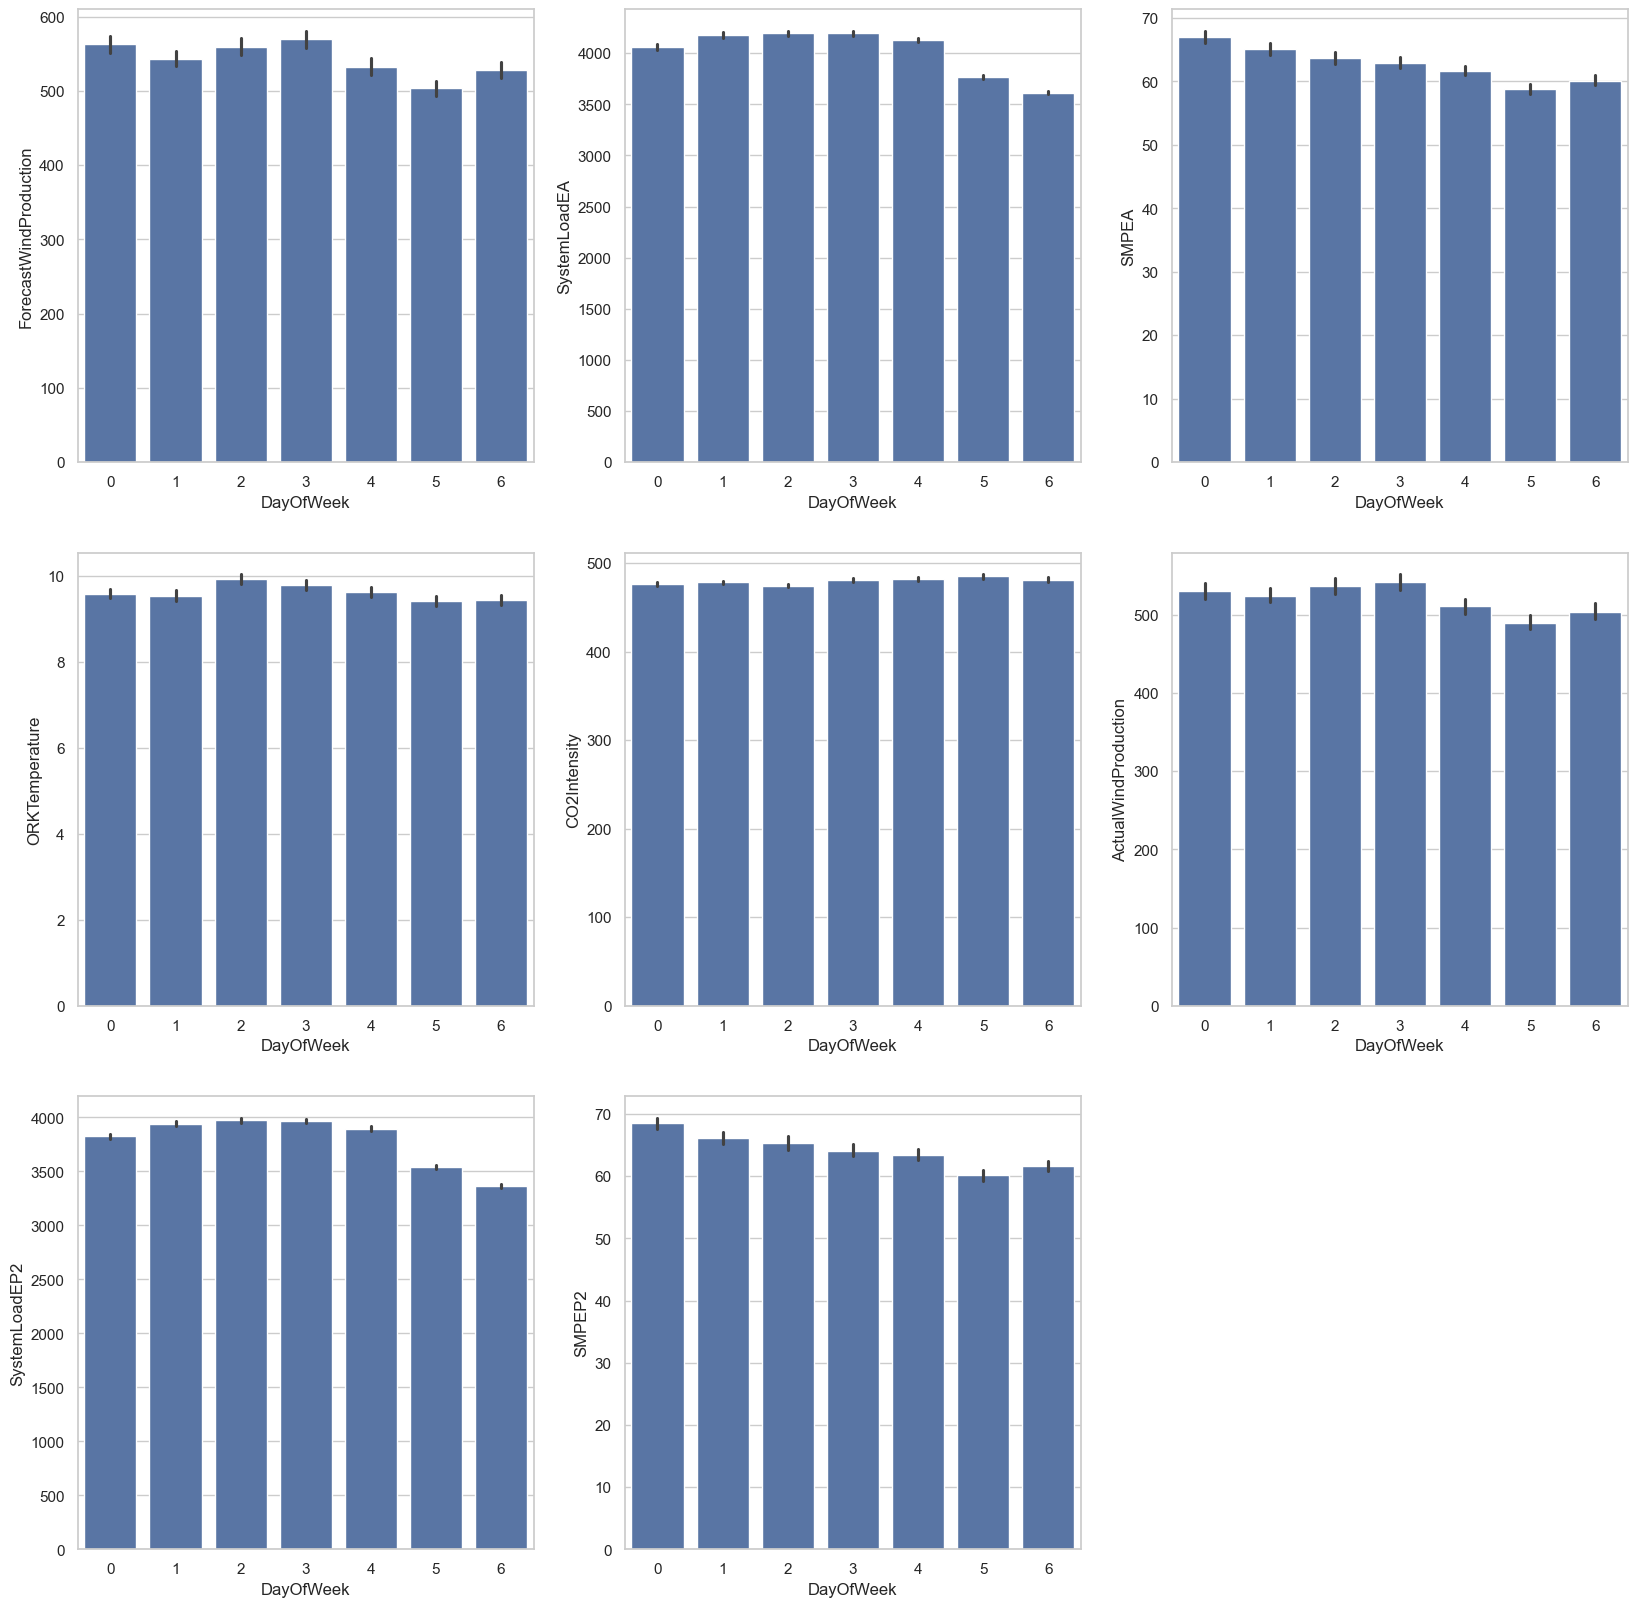

In [71]:
plt.figure(figsize=(20,20))
for i in range(1,data.shape[1]):
    plt.subplot(3,3,i)
    sns.barplot(data=data, x='DayOfWeek', y=data.columns[i])


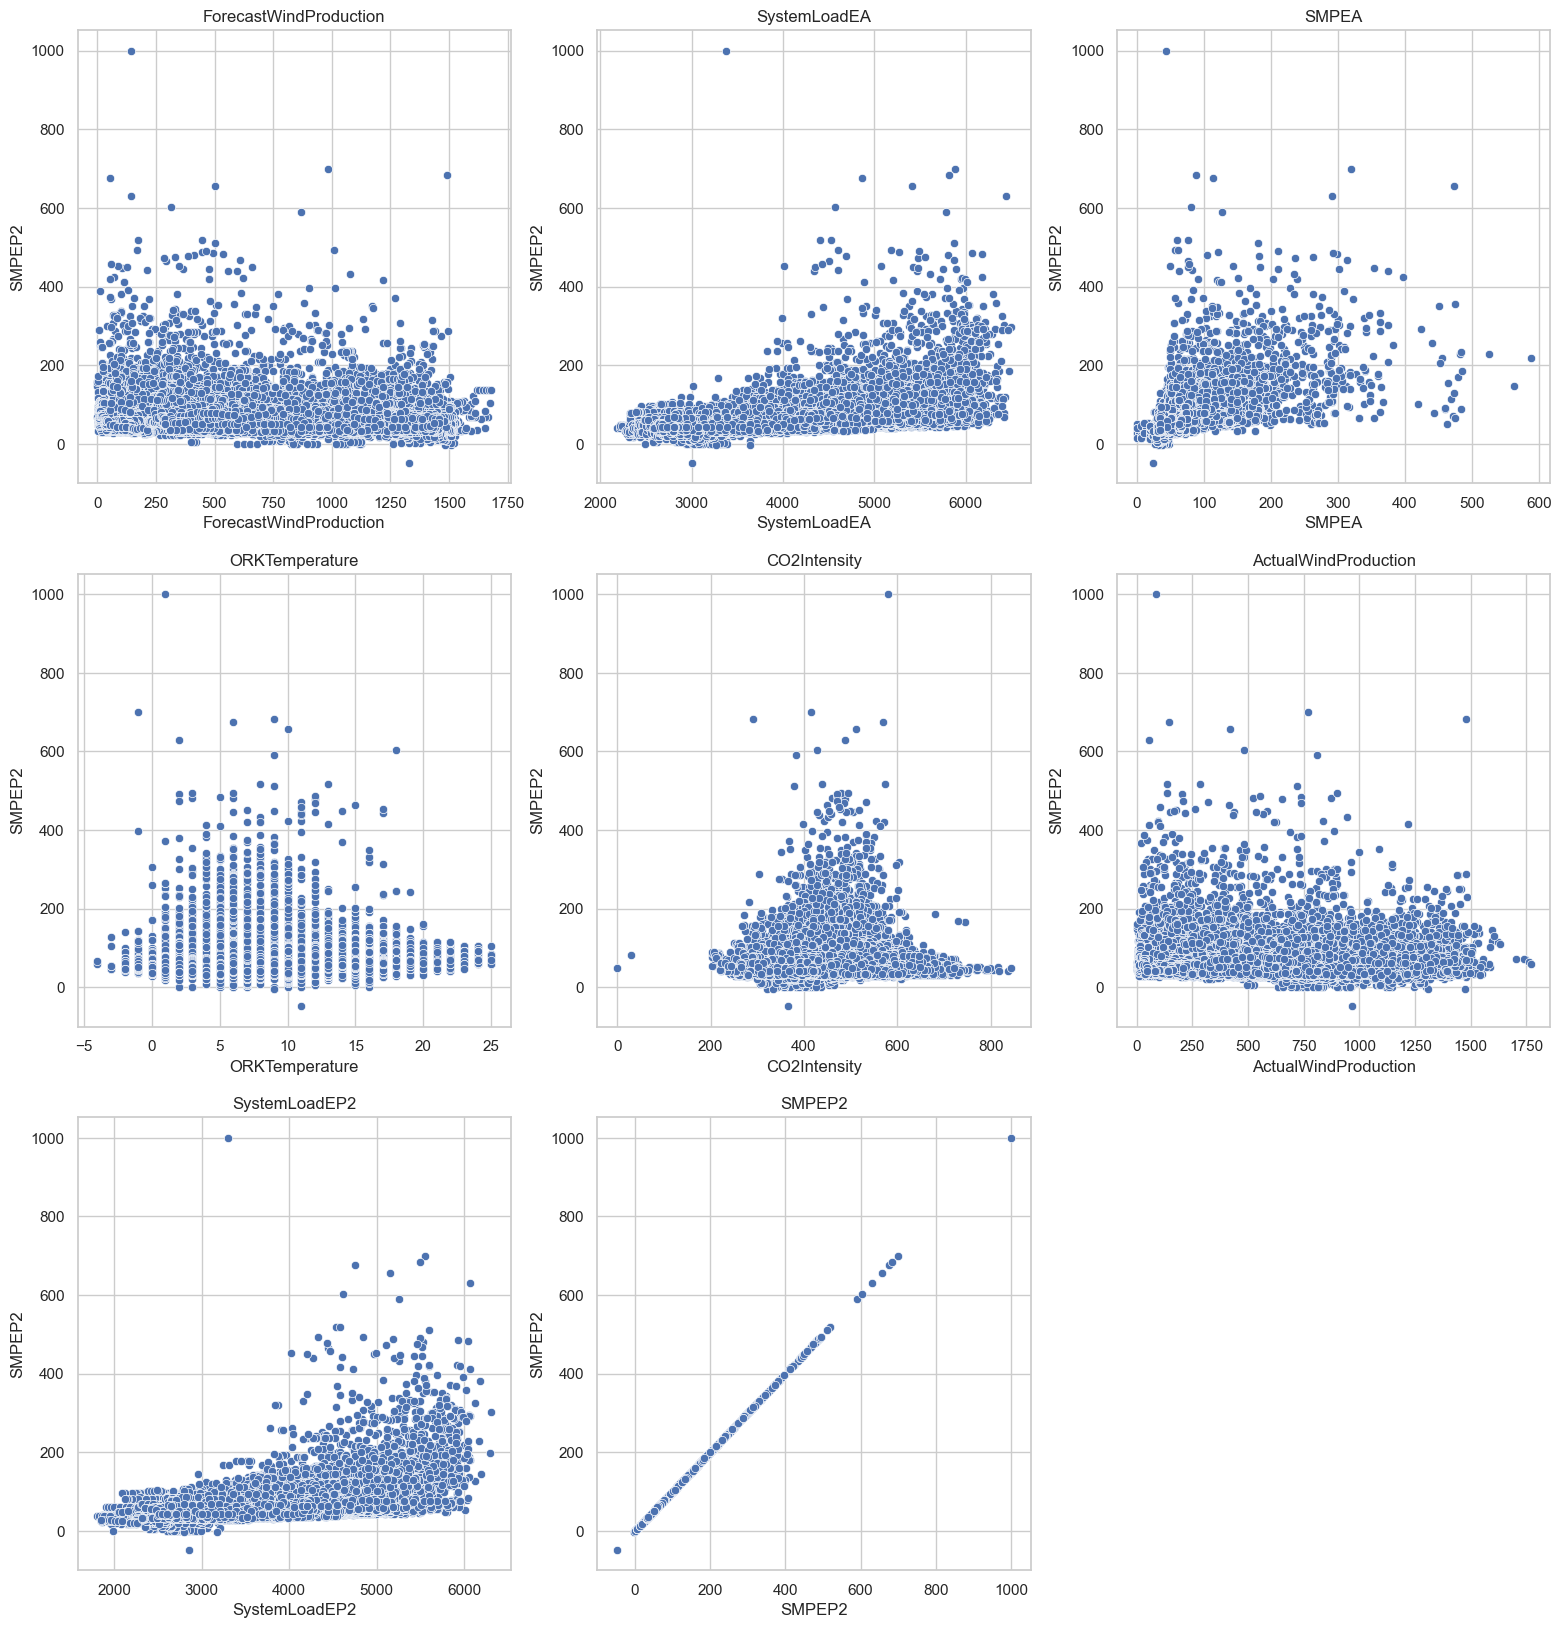

In [72]:
plt.figure(figsize=(19,20))
for i in range(1,data.shape[1]):
    plt.subplot(3,3,i)
    sns.scatterplot(data=data, x=data.columns[i], y='SMPEP2')
    plt.title(data.columns[i])

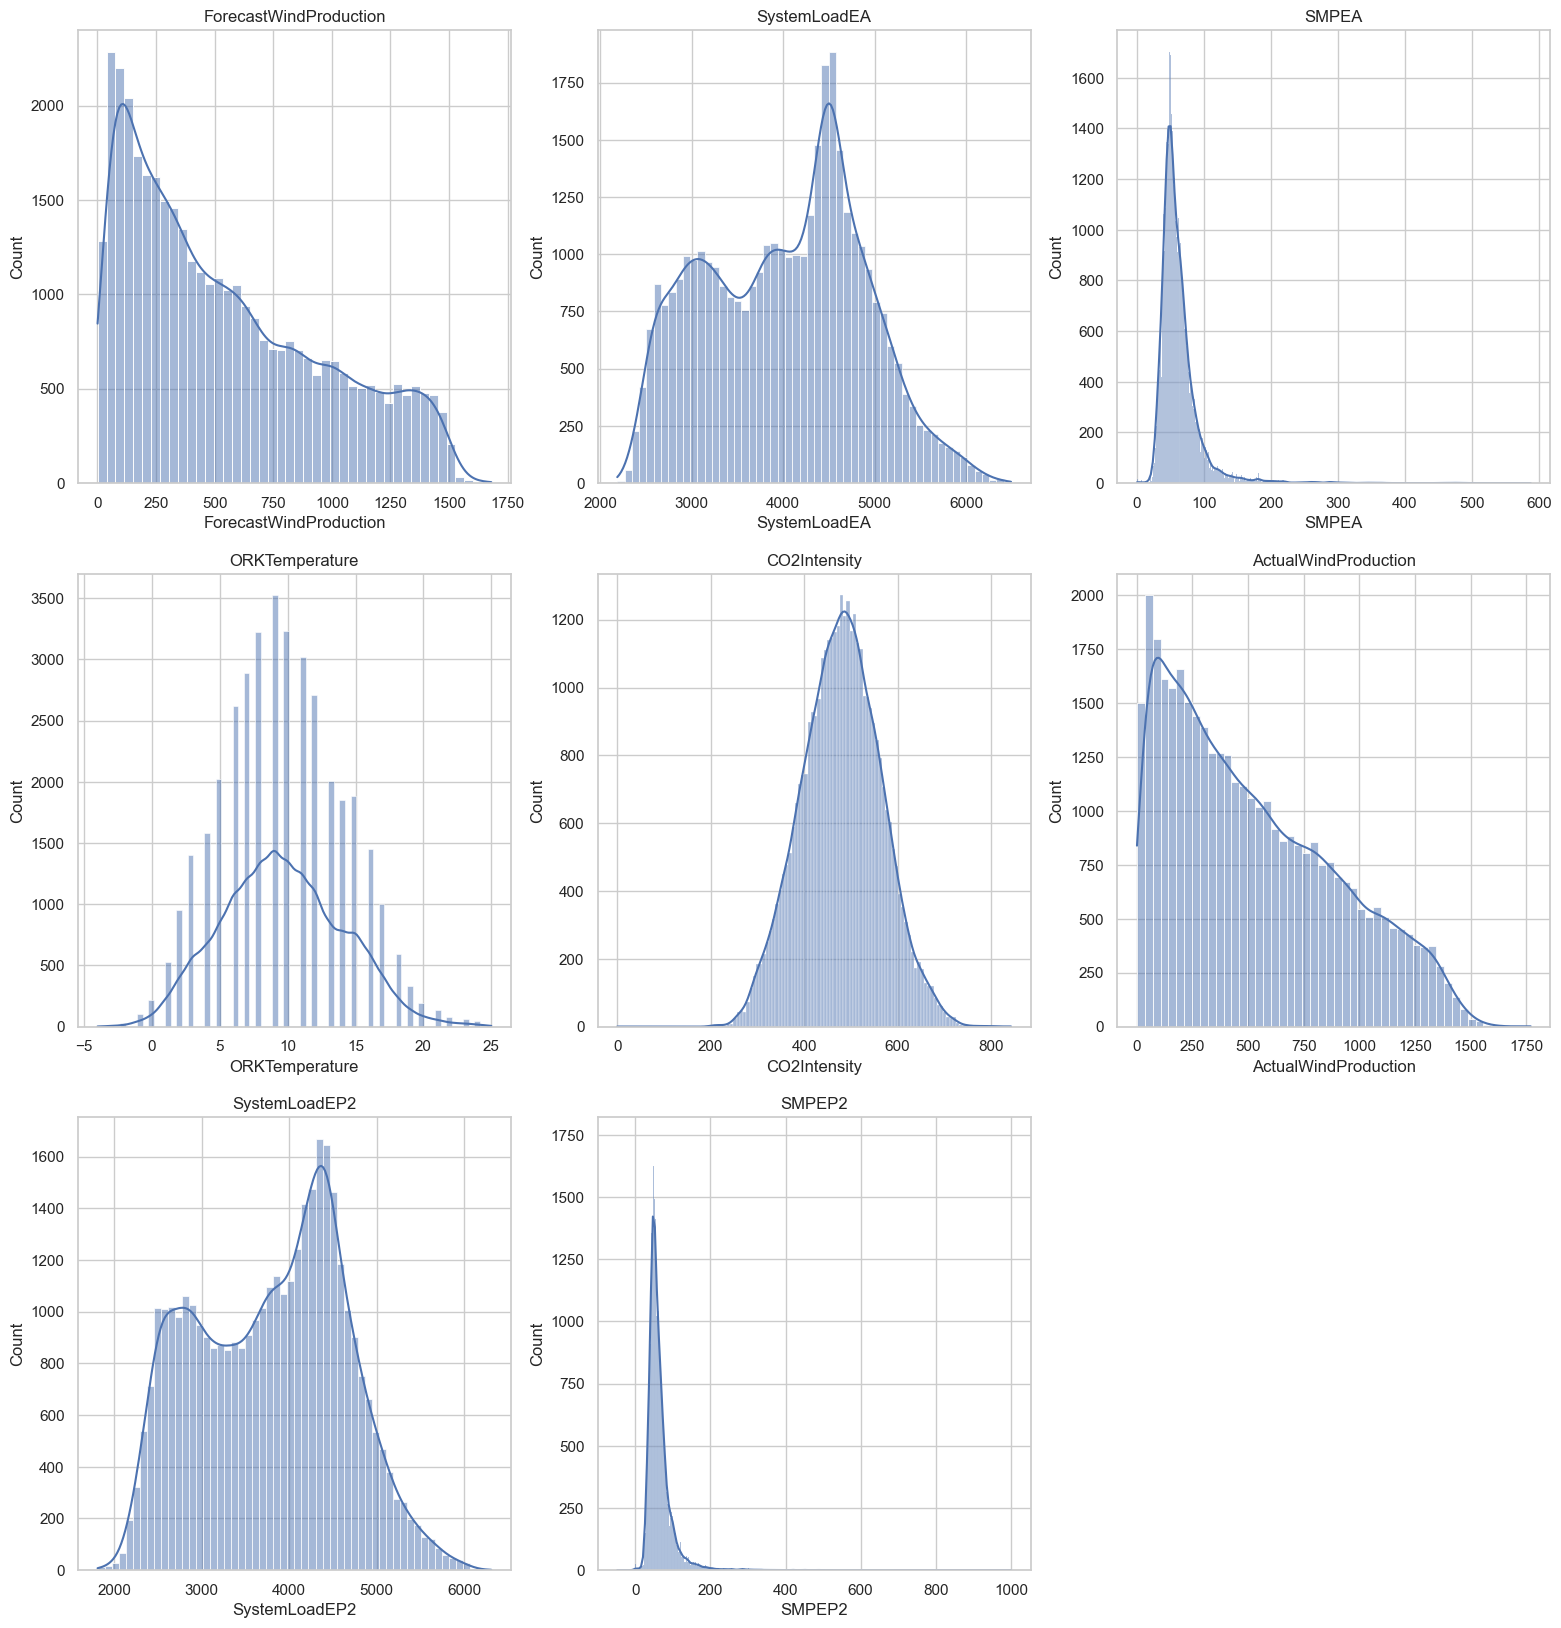

In [73]:
plt.figure(figsize=(19,20))
for i in range(1,data.shape[1]):
    plt.subplot(3,3,i)
    sns.histplot(data=data, x=data.columns[i], kde=True)
    plt.title(data.columns[i])

# Training

In [87]:
num_cols = data.columns.drop("DayOfWeek")
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors="coerce")

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

processor = ColumnTransformer(transformers=[("scaler",StandardScaler(),X.columns)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = {
    "LR" : {"model":LinearRegression(), "params":{} },
    "Lasso" : {"model": Lasso(),"params": {"regressor__alpha":[0.001,0.01,0.5,0.1], "regressor__max_iter":[1000,2000,3000]}},
    "Ridge" : {"model": Ridge(), "params": {"regressor__alpha":[10,5,0.1,1], "regressor__max_iter":[1000,2000,3000]}},
    "Poly" : {"model": Pipeline([("poly",PolynomialFeatures()), ("regressor",LinearRegression())]),"params":{"regressor__poly__degree":[2,3,4]}}
}

best_rmse = float("inf")
best_model = None

for name, model_df in models.items():
    pipeline = Pipeline(steps=[("processing",processor), ("regressor",model_df['model'])])

    grid = GridSearchCV(pipeline, cv=5, param_grid=model_df['params'])
    grid.fit(X_train, y_train)

    model = grid.best_estimator_
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)

    if rmse<best_rmse:
        best_rmse = rmse
        best_model = model

    print(f"Model:  {name}")
    print(f"best_params: {grid.best_params_}")
    print(f"rmse:  {rmse: .2f}")
    print(f"R2 Score: {r2:.2f}")
print(f"best_model:  {best_model}")
joblib.dump(best_model, "Elect_Bill.pkl")
    

Model:  LR
best_params: {}
rmse:   25.75
R2 Score: 0.46
Model:  Lasso
best_params: {'regressor__alpha': 0.01, 'regressor__max_iter': 1000}
rmse:   25.74
R2 Score: 0.46
Model:  Ridge
best_params: {'regressor__alpha': 10, 'regressor__max_iter': 1000}
rmse:   25.75
R2 Score: 0.46
Model:  Poly
best_params: {'regressor__poly__degree': 2}
rmse:   24.45
R2 Score: 0.51
best_model:  Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['DayOfWeek', 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
       'ORKTemperature', 'CO2Intensity', 'ActualWindProduction',
       'SystemLoadEP2'],
      dtype='object'))])),
                ('regressor',
                 Pipeline(steps=[('poly', PolynomialFeatures()),
                                 ('regressor', LinearRegression())]))])


['Elect_Bill.pkl']